# Ford GoBike

## Investigative Overview
> In this investigation, I wanted to look at the characteristic of Ford GoBike that could be used to predict the duration of future trips. The main focus were the gender of users, user type and bike share for all. 

## Dataset Overview
> The dataset used for this project includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Trip duration distribution

Trip duration has a very wide range with a minimum value of 61 seconds and a maximum value of 85444 seconds. plotted on a logarithimic scale, the distribution of trips duration shows a skewed shape. 

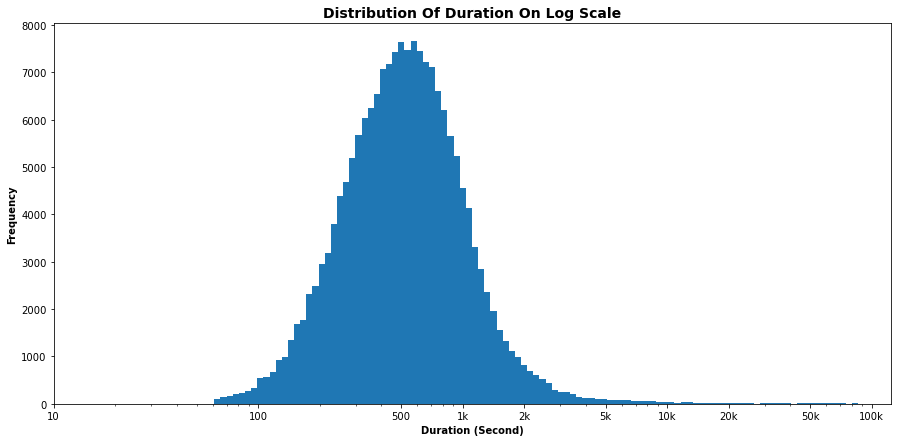

In [4]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(np.log10(df.duration_sec).min(), np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 7])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 100, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [10, 100, 500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])

# Add title and format it
plt.title('Distribution of Duration on Log scale'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Duration (second)'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Frequency'.title(),
               fontsize = 10, weight = "bold")

plt.show()

## Frequency of members year of birth

While there are many recorded birth year for members, we look at the frequency in which they appear in this dataset.

In [5]:
default_color = sb.color_palette()[0]

In [6]:
def plot_counts(df, xVar, hue=None, color=default_color, order=None, figsize=(15, 7)):
    '''
    docstring: Plots the count plot for any data
    input:
        df [required] <trype: dataframe>: the data to plot. 
        xVar [required] <type: str>: The column to plot.
        color [optional]: The color of the chart bars.
        order [optional]: The order of the bars.
        figsize [optional] <type: list or tuple>: the size of the chart
    output: return a countplot of the data with the xVar column.
        
    '''
    
    plt.figure(figsize=figsize)
    sb.countplot(
        data=df,
        x=xVar,
        hue=hue,
        color=color,
        order=order,
        edgecolor='black'
    )
    xVar = xVar.replace('_', ' ') # replace all underscore (_) with am empty space ' '
    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

In [7]:
# a dataframe (subset) where year of birth is not na

year = df['member_birth_year'] = df.loc[df['member_birth_year'].notna(), ['member_birth_year']].astype(int)

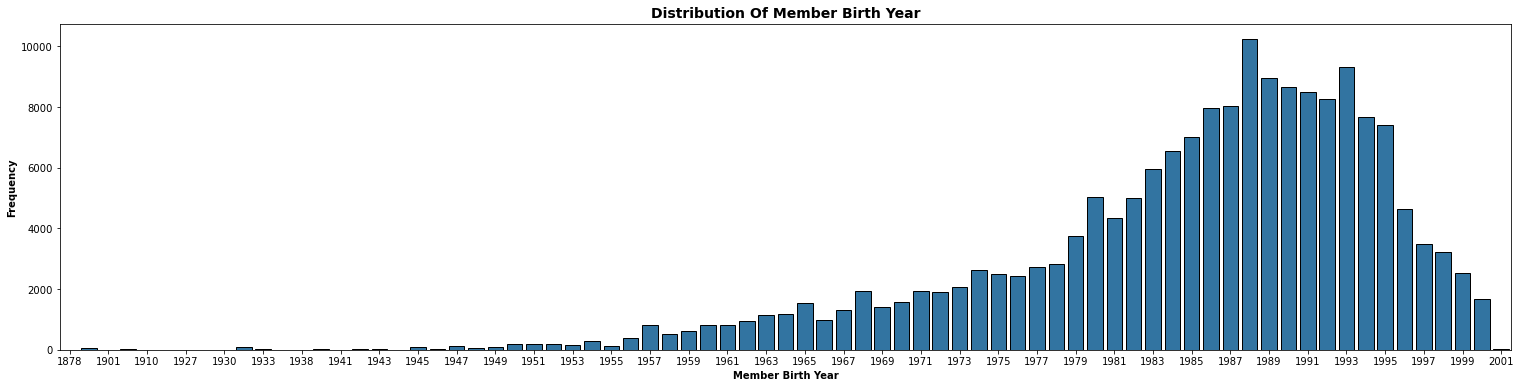

In [8]:
#  Lets plot a count plot of the users birth year to have a look at the most comon birth year

plot_counts(year, 'member_birth_year', figsize=(26, 6))

pos, lab = plt.xticks()
plt.xticks(pos[::2], lab[::2]);

## Correlation

A very low correlation is noted between the features of this dataset. 

In [9]:
# correlation plot
def plot_corr(cols):
    plt.figure(figsize = [8, 5])
    sb.heatmap(df[cols].corr(), annot = True, fmt = '.3f',
               cmap = 'vlag_r', center = 0)
    plt.show()

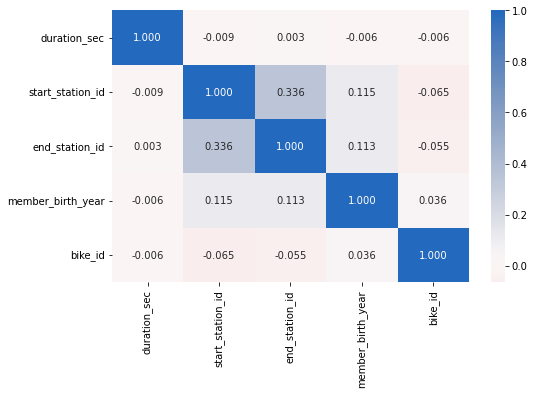

In [10]:
plot_corr(['duration_sec', 'start_station_id', 'end_station_id', 'member_birth_year', 'bike_id'])

## Trip duration for bike share and gender

There isn't available for customer the option to select bike share and the other gender > female > male. The same pattern is noted for the subscribers as well

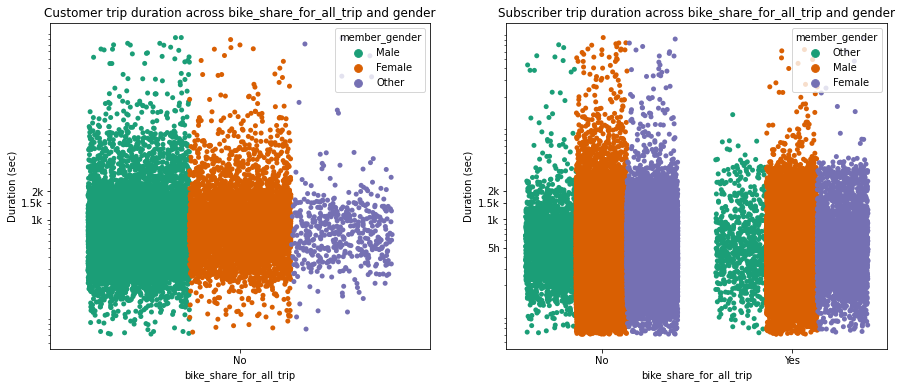

In [11]:
customer = df.query('user_type == "Customer"')
subscriber = df.query('user_type == "Subscriber"')

fig, ax = plt.subplots(ncols = 2, figsize = [15,6])

sb.stripplot(data = customer, x = 'bike_share_for_all_trip', y = 'duration_sec', hue = 'member_gender',
             palette = 'Dark2', jitter = 0.4, dodge = True, ax = ax[0])
ax[0].set_title('Customer trip duration across bike_share_for_all_trip and gender')
ax[0].set_ylabel('Duration (sec)')
ax[0].set_yscale('log')
ax[0].set_yticks([1000, 1500, 2000])
ax[0].set_yticklabels(['1k', '1.5k', '2k'])
ax[0].set_yticklabels([],minor = True)

sb.stripplot(data = subscriber, x = 'bike_share_for_all_trip', y = 'duration_sec', hue = 'member_gender',
             palette = 'Dark2', jitter = 0.4, dodge = True, ax = ax[1])
ax[1].set_title('Subscriber trip duration across bike_share_for_all_trip and gender')
ax[1].set_ylabel('Duration (sec)')
ax[1].set_yscale('log')
ax[1].set_yticks([5e2, 1e3, 1.5e3, 2e3])
ax[1].set_yticklabels(['5h', '1k', '1.5k', '2k'])
ax[1].set_yticklabels([],minor = True)
plt.show();

In [12]:
!jupyter nbconvert Ford_GoBike_part_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_part_2.ipynb to slides
[NbConvertApp] Writing 838305 bytes to Ford_GoBike_part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SHANDING\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_fil